In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

2023-07-06 22:44:34.849432: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-06 22:44:34.892847: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 22:44:35.571517: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def over_under_plot(
    param = '4',
    train = False, train_data = '1', 
    comp1 = 'Weighted Mean Thickness 4', comp2 = 'Thickness', method = 'thick'
):
    df = gl.load_notebook_data(param)
    # glac = gl.load_training_data(RGI_input = 'y')
    if train == True:
        glac = gl.parameterize_data(train_data)
        glac = glac[['RGIId', 'Thickness']]
        df = pd.merge(df, glac, on = 'RGIId', how = 'inner')
    df['Residual'] = df[comp1] - df[comp2]

    df['Zd'] = df['Zmax'] - df['Zmin']
    dfg = df[(df[comp1] / df[comp2])>= 1]
    dfl = df[(df[comp1] / df[comp2])<= 1]
    # dfg = dfg.drop(dfg[
    #     (dfg['Lmax'] == -9) |
    #     (dfg['Zmin'] == -999) |
    #     (dfg['Zmax'] == -999) |
    #     (dfg['Zmed'] == -999)
    # ].index, axis = 0)
    # dfl = dfl.drop(dfl[
    #     (dfl['Lmax'] == -9) |
    #     (dfl['Zmin'] == -999) |
    #     (dfl['Zmax'] == -999) |
    #     (dfl['Zmed'] == -999)
    # ].index, axis = 0)
    # df = df.dropna()
    
    if method == 'thick':
        
        plt.scatter(
            dfg[comp2] , 
            dfg[comp1] ,
            marker = '.',
#             c = np.log(dfg['Area']),
#             cmap = 'viridis',
#             vmin = np.min(np.log(dfl['Area'])),
#             vmax = np.max(np.log(dfg['Area'])),
#             label = 'Over Estimates',
        )
        plt.scatter(
            dfl[comp2] , 
            dfl[comp1] ,
            marker = '.',
#             c = np.log(dfl['Area']),
#             cmap = 'viridis',
#             vmin = np.min(np.log(dfl['Area'])),
#             vmax = np.max(np.log(dfg['Area'])),
#             label = 'Under Estimates'
        )
        plt.xlabel(comp2 + ' (m)')
        plt.ylabel(comp1 + ' (m)')
#         plt.colorbar(label = 'Log Area')

    if method == 'vol':
        
        plt.scatter(
            dfg[comp2] / 1e3 * dfg['Area'], 
            dfg[comp1] / 1e3 * dfg['Area'],
            marker = '.',
            label = 'Over Estimates'
        )
        plt.scatter(
            dfl[comp2] / 1e3 * dfl['Area'], 
            dfl[comp1] / 1e3 * dfl['Area'],
            marker = '.',
            label = 'Under Estimates'
        )
        plt.xlabel('Compared Volume (km$^3$)')
        plt.ylabel('Estimated Volume (km$^3$)')
    thick = np.array([
    dfg[comp1].max(), dfg[comp2].max(), dfl[comp1].max(), dfl[comp2].max()
    ])
    x1 = thick.max()
    vol = np.array([
    (dfg[comp1] / 1e3 * dfg['Area']).max(), (dfg[comp2]/ 1e3 * dfg['Area']).max(),
    (dfl[comp1]/ 1e3 * dfl['Area']).max(), (dfl[comp2]/ 1e3 * dfl['Area']).max()
    ])

    x2 = vol.max()

    if method == 'thick':
        plt.plot(
            [0,x1],
            [0,x1],
            c = 'orange',
            linewidth = 1
        )
    if method == 'vol':
        plt.plot(
            [0,x2],
            [0,x2],
            c = 'orange',
            linewidth = 1
        )
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


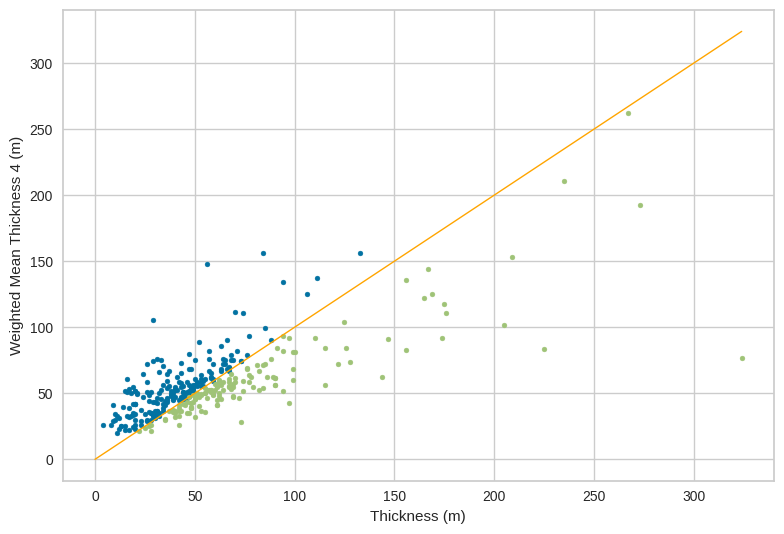

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


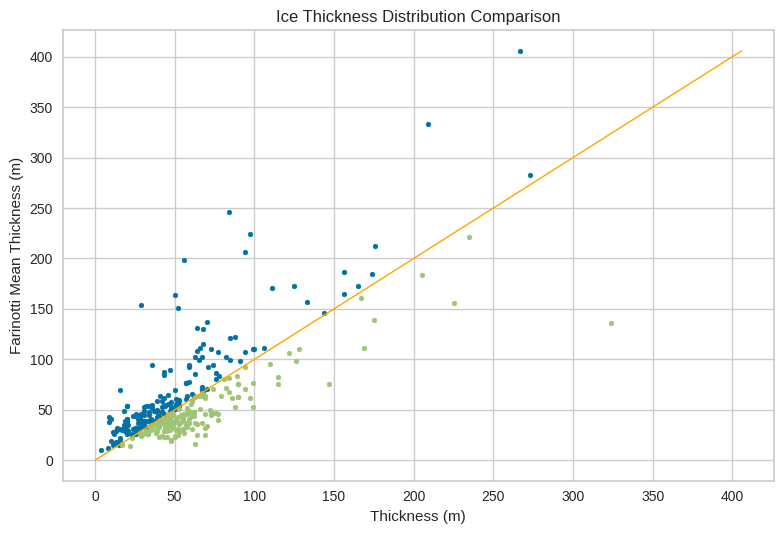

In [3]:
# over_under_plot(
#     '4',
# #     train = True, train_data = '4', 
#     comp1 = 'Weighted Mean Thickness 4',
#     comp2 = 'Farinotti Mean Thickness',
#     method = 'vol'
# )

# plt.title('Ice Volume Distribution Comparison')
# plt.xscale('log')
# plt.yscale('log')

# plt.tight_layout()
# plt.show()

over_under_plot(
    '4',
    train = True, train_data = '4', 
    comp1 = 'Weighted Mean Thickness 4',
    comp2 = 'Thickness',
    method = 'thick'
)
plt.tight_layout()
plt.show()

over_under_plot(
    '4',
    train = True, train_data = '4', 
    comp1 = 'Farinotti Mean Thickness',
    comp2 = 'Thickness',
    method = 'thick'
)

# plt.xscale('log')
# plt.yscale('log')
plt.title('Ice Thickness Distribution Comparison')
# plt.xscale('log')
# plt.yscale('log')

plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


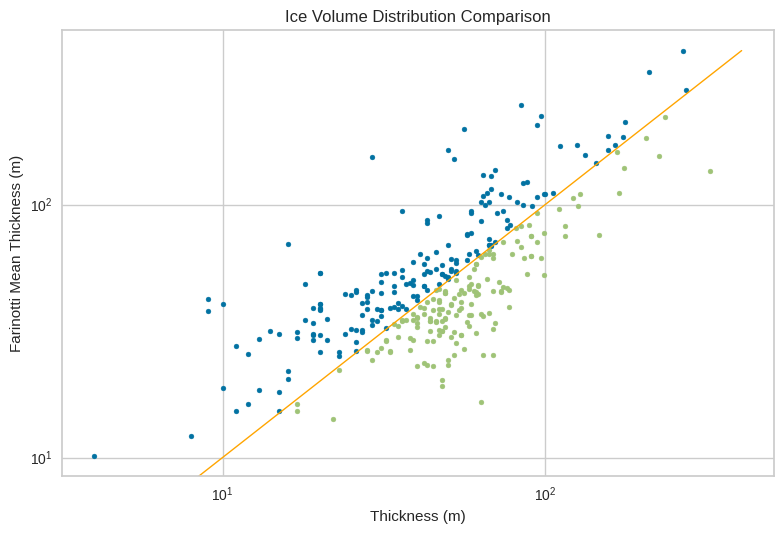

In [4]:
# fig, ax = plt.subplots(2,1,figsize = (7,10))
# desired_train_params = ['4','1']
# for n, i in enumerate(range(0,2,1)):
#     if n == 0:
#         i = '1'
#     if n == 1:
#         i = '4'
#     ax = plt.subplot(2,1,n+1)
#     ax = over_under_plot('4',i, comp = 'Farinotti Mean Thickness')
# ax[1] = over_under_plot('4', '4')
over_under_plot(
    '4',
    train = True, train_data = '4', 
    comp1 = 'Farinotti Mean Thickness',
    comp2 = 'Thickness',
    method = 'thick'
)
plt.title('Ice Volume Distribution Comparison')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()

In [5]:
def over_under_data(param = '4',train = False, train_data = '1', 
                    comp1 = 'Weighted Mean Thickness 4', comp2 = 'Thickness'):
    df = gl.load_notebook_data(param)
    # glac = gl.load_training_data(RGI_input = 'y')
    if train == True:
        glac = gl.parameterize_data(train_data)
        glac = glac[['RGIId', 'Thickness']]
        df = pd.merge(df, glac, on = 'RGIId', how = 'inner')
    df['Residual'] = (df[comp1] - df[comp2])
    df['log area'] = np.log(df['Area'])
    df['Zd'] = df['Zmax'] - df['Zmin']
    df['Ratio'] = df[comp1] / df[comp2]
    dfg = df[(df[comp1] / df[comp2])>= 1]
    dfl = df[(df[comp1] / df[comp2])<= 1]
    # dfg = dfg.drop(dfg[
    #     (dfg['Lmax'] == -9) |
    #     (dfg['Zmin'] == -999) |
    #     (dfg['Zmax'] == -999) |
    #     (dfg['Zmed'] == -999)
    # ].index, axis = 0)
    # dfl = dfl.drop(dfl[
    #     (dfl['Lmax'] == -9) |
    #     (dfl['Zmin'] == -999) |
    #     (dfl['Zmax'] == -999) |
    #     (dfl['Zmed'] == -999)
    # ].index, axis = 0)
    # df = df.dropna()
    return df, dfg, dfl

In [35]:
df, dfg, dfl = over_under_data(
    '4', train = True, train_data = '4',
    comp1 = 'Weighted Mean Thickness 1', comp2 = 'Farinotti Mean Thickness'
)

In [36]:
dfg

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness 1,Weighted Mean Thickness 2,Weighted Mean Thickness 3,Weighted Mean Thickness 4,Corrected Thickness,Corrected Thickness Uncertainty,Residual Correction,Residual Correction Uncertainty,Bootstrap Uncertainty,Weighted Bootstrap Uncertainty_1,Weighted Bootstrap Uncertainty_2,Weighted Bootstrap Uncertainty_3,Weighted Bootstrap Uncertainty_4,Composite Deviation Uncertainty_1,Composite Deviation Uncertainty_2,Composite Deviation Uncertainty_3,Composite Deviation Uncertainty_4,Composite Deviation Uncertainty 3,Composite Deviation Uncertainty 20,Composite Deviation Uncertainty 40,Composite Deviation Uncertainty 60,Composite Deviation Uncertainty 80,Weighted Deviation Uncertainty_1,Weighted Deviation Uncertainty_2,Weighted Deviation Uncertainty_3,Weighted Deviation Uncertainty_4,Weighted Deviation Uncertainty_4_1,Weighted Deviation Uncertainty_4_2,Simple Deviation Uncertainty_4,MAE Uncertainty,Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness,Residual,log area,Zd,Ratio
1,RGI60-01.00570,90.494202,91.317276,15.268613,90.428007,90.313272,90.316712,90.794418,103.970503,1259.267243,-13.542496,23.213818,0.015211,214.499329,223.118536,223.229675,208.131658,7.631602,7.620744,7.620744,8114.782769,395.087718,37.646807,18.951143,12.774442,9.614525,1236.053425,1236.725925,1236.821753,1246.891161,1.321018e+06,0.975511,688.711669,266.375041,79.049373,103.966450,0.953788,6.639497e-34,16.051460,4025.0,01,63.28100,-145.42700,14.0,1162,1858,2438,17.567,172,8639,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,147.0,14.771217,2.866022,1276,1.195240
3,RGI60-01.16374,67.979103,67.343613,12.929232,67.879119,67.859826,67.863862,68.128457,71.206004,699.285503,-3.326885,1.637143,0.011914,159.598535,163.046847,163.106629,158.828281,4.302532,4.306342,4.306342,4574.046259,215.046245,20.988183,10.595381,7.188800,5.418646,697.648360,697.987888,698.071170,703.219132,7.451009e+05,0.850274,388.639342,266.375041,55.116073,80.756830,0.994698,6.001210e-11,16.927746,4025.0,01,61.20000,-140.30200,14.0,2145,2509,2894,5.859,341,3374,50.680640,0.971547,1.995731e-39,49.849970,6.921771,0.179289,0.296938,66.0,17.198479,1.767979,749,1.339350
4,RGI60-02.03411,58.222748,57.679188,10.247830,58.137302,58.139859,58.143183,58.311238,58.137302,511.875863,0.909739,0.257628,0.007436,100.257195,102.657023,102.701670,100.227160,3.158328,3.163346,3.163346,3357.364526,162.668639,15.330355,7.743316,5.246304,3.968598,511.875863,512.115241,512.173735,515.258118,5.460121e+05,0.528945,285.089578,266.375041,48.996700,68.138184,0.989274,6.414941e-17,13.486774,4025.0,02,51.17700,-116.33000,15.3,2390,2526,2853,0.872,69,1181,34.028140,0.936336,6.454268e-24,34.646187,7.441120,0.570123,0.029673,70.0,24.109162,-0.136966,463,1.708507
5,RGI60-02.13754,54.427780,53.334053,11.392898,54.318263,54.350794,54.354759,54.487079,54.318263,447.526429,2.540263,0.958427,0.009258,125.876265,127.808477,127.850143,126.330180,2.753475,2.761189,2.761189,2926.590691,137.027083,13.327480,6.739493,4.585507,3.460733,447.526429,447.720129,447.785335,450.550728,4.774808e+05,0.662323,249.136415,266.375041,43.812816,65.677015,0.988881,2.908840e-17,14.161552,4025.0,02,44.16497,-121.78496,17.6,2221,2544,2803,1.170,344,1666,34.035408,0.967572,4.517051e-20,31.859420,4.033084,0.110319,0.039821,19.0,20.282855,0.157004,582,1.595934
6,RGI60-02.13805,53.194901,52.325005,10.564065,53.095515,53.126276,53.129945,53.242816,53.095515,427.544475,3.059268,1.302151,0.007916,107.318538,109.647507,109.694892,107.579317,2.630872,2.638086,2.638086,2796.843460,136.557763,12.668614,6.409970,4.356381,3.303207,427.544475,427.730776,427.789557,430.152719,4.558114e+05,0.564271,23

In [37]:
dfl

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness 1,Weighted Mean Thickness 2,Weighted Mean Thickness 3,Weighted Mean Thickness 4,Corrected Thickness,Corrected Thickness Uncertainty,Residual Correction,Residual Correction Uncertainty,Bootstrap Uncertainty,Weighted Bootstrap Uncertainty_1,Weighted Bootstrap Uncertainty_2,Weighted Bootstrap Uncertainty_3,Weighted Bootstrap Uncertainty_4,Composite Deviation Uncertainty_1,Composite Deviation Uncertainty_2,Composite Deviation Uncertainty_3,Composite Deviation Uncertainty_4,Composite Deviation Uncertainty 3,Composite Deviation Uncertainty 20,Composite Deviation Uncertainty 40,Composite Deviation Uncertainty 60,Composite Deviation Uncertainty 80,Weighted Deviation Uncertainty_1,Weighted Deviation Uncertainty_2,Weighted Deviation Uncertainty_3,Weighted Deviation Uncertainty_4,Weighted Deviation Uncertainty_4_1,Weighted Deviation Uncertainty_4_2,Simple Deviation Uncertainty_4,MAE Uncertainty,Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness,Residual,log area,Zd,Ratio
0,RGI60-01.00037,209.310257,216.130905,40.039093,209.414640,208.741179,208.741627,210.543411,286.417269,7364.813874,-77.002629,741.688600,0.080467,1382.252822,1467.138870,1467.772619,1268.427839,40.550993,40.276165,40.276165,43148.680568,2067.725507,202.844574,102.618077,68.703318,51.391415,6623.125274,6627.490671,6627.557239,6697.944572,7.093469e+06,3.295247,3684.487314,266.375041,192.358621,235.870333,0.720072,0.000000e+00,28.533295,4025.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,235.0,-11.954100,5.457809,2359,0.945999
2,RGI60-01.01104,90.167320,91.284256,15.082670,90.110564,89.972914,89.976154,90.499796,103.506704,1249.944704,-13.396140,22.789596,0.015024,206.808072,214.177880,214.268610,200.861215,7.573048,7.557663,7.557663,8053.594303,384.153005,37.283238,18.828673,12.723293,9.574094,1227.155109,1227.844978,1227.935729,1238.564396,1.311983e+06,0.983201,683.745272,266.375041,79.155022,103.335890,0.951711,1.637178e-34,16.129356,4025.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,66.0,-20.791116,2.254235,818,0.812527
23,RGI60-03.00691,104.756165,106.457901,17.723658,104.721816,104.521742,104.524748,105.184731,125.040063,1708.598396,-20.318247,51.957643,0.019800,282.853470,294.902464,295.027437,270.609826,10.218302,10.187775,10.187775,10865.558449,519.519188,50.719385,25.511927,17.194098,12.881781,1656.640753,1657.604503,1657.703869,1672.341371,1.771739e+06,1.223692,922.901006,266.375041,92.958039,119.339339,0.906900,2.942727e-44,17.380959,4025.0,03,79.982000,-99.190400,6.6,48,146,264,92.926,326,9703,154.034410,0.990230,4.778428e-43,163.019550,12.066452,-0.149386,14.313802,29.0,-49.312594,4.531803,216,0.679860
24,RGI60-04.06187,260.801422,269.030579,48.611458,260.983255,260.099788,260.097701,262.387116,370.453847,11781.260599,-109.470591,1497.307143,0.101928,2010.665431,2153.773649,2154.760782,1802.954230,62.966282,62.499687,62.499687,66992.317878,3177.700546,314.394048,159.127675,106.543698,79.861181,10283.953457,10290.844216,10290.751861,10399.916117,1.101500e+07,2.779625,5720.263469,266.375041,249.151132,287.634795,0.566819,0.000000e+00,25.550613,4025.0,04,70.021400,-73.057500,3.6,403,860,1117,2771.412,51,29873,405.835300,0.966815,0.000000e+00,471.248570,19.427965,-0.516314,1124.736820,267.0,-144.852045,7.927112,714,0.643077
27,RGI60-07.00118,75.809891,76.435852,9.658360,75.768095,75.722732,75.724821,75.950774,82.599305,873.484061,-6.831209,5.924506,0.006184,88.135096,91.690057,91.730797,85.348468,5.375599,5.376777,5.376777,5708.16626

In [38]:
df

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness 1,Weighted Mean Thickness 2,Weighted Mean Thickness 3,Weighted Mean Thickness 4,Corrected Thickness,Corrected Thickness Uncertainty,Residual Correction,Residual Correction Uncertainty,Bootstrap Uncertainty,Weighted Bootstrap Uncertainty_1,Weighted Bootstrap Uncertainty_2,Weighted Bootstrap Uncertainty_3,Weighted Bootstrap Uncertainty_4,Composite Deviation Uncertainty_1,Composite Deviation Uncertainty_2,Composite Deviation Uncertainty_3,Composite Deviation Uncertainty_4,Composite Deviation Uncertainty 3,Composite Deviation Uncertainty 20,Composite Deviation Uncertainty 40,Composite Deviation Uncertainty 60,Composite Deviation Uncertainty 80,Weighted Deviation Uncertainty_1,Weighted Deviation Uncertainty_2,Weighted Deviation Uncertainty_3,Weighted Deviation Uncertainty_4,Weighted Deviation Uncertainty_4_1,Weighted Deviation Uncertainty_4_2,Simple Deviation Uncertainty_4,MAE Uncertainty,Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness,Residual,log area,Zd,Ratio
0,RGI60-01.00037,209.310257,216.130905,40.039093,209.414640,208.741179,208.741627,210.543411,286.417269,7364.813874,-77.002629,741.688600,0.080467,1382.252822,1467.138870,1467.772619,1268.427839,40.550993,40.276165,40.276165,43148.680568,2067.725507,202.844574,102.618077,68.703318,51.391415,6623.125274,6627.490671,6627.557239,6697.944572,7.093469e+06,3.295247,3684.487314,266.375041,192.358621,235.870333,0.720072,0.000000e+00,28.533295,4025.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,235.0,-11.954100,5.457809,2359,0.945999
1,RGI60-01.00570,90.494202,91.317276,15.268613,90.428007,90.313272,90.316712,90.794418,103.970503,1259.267243,-13.542496,23.213818,0.015211,214.499329,223.118536,223.229675,208.131658,7.631602,7.620744,7.620744,8114.782769,395.087718,37.646807,18.951143,12.774442,9.614525,1236.053425,1236.725925,1236.821753,1246.891161,1.321018e+06,0.975511,688.711669,266.375041,79.049373,103.966450,0.953788,6.639497e-34,16.051460,4025.0,01,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,147.0,14.771217,2.866022,1276,1.195240
2,RGI60-01.01104,90.167320,91.284256,15.082670,90.110564,89.972914,89.976154,90.499796,103.506704,1249.944704,-13.396140,22.789596,0.015024,206.808072,214.177880,214.268610,200.861215,7.573048,7.557663,7.557663,8053.594303,384.153005,37.283238,18.828673,12.723293,9.574094,1227.155109,1227.844978,1227.935729,1238.564396,1.311983e+06,0.983201,683.745272,266.375041,79.155022,103.335890,0.951711,1.637178e-34,16.129356,4025.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,66.0,-20.791116,2.254235,818,0.812527
3,RGI60-01.16374,67.979103,67.343613,12.929232,67.879119,67.859826,67.863862,68.128457,71.206004,699.285503,-3.326885,1.637143,0.011914,159.598535,163.046847,163.106629,158.828281,4.302532,4.306342,4.306342,4574.046259,215.046245,20.988183,10.595381,7.188800,5.418646,697.648360,697.987888,698.071170,703.219132,7.451009e+05,0.850274,388.639342,266.375041,55.116073,80.756830,0.994698,6.001210e-11,16.927746,4025.0,01,61.200000,-140.302000,14.0,2145,2509,2894,5.859,341,3374,50.680640,0.971547,1.995731e-39,49.849970,6.921771,0.179289,0.296938,66.0,17.198479,1.767979,749,1.339350
4,RGI60-02.03411,58.222748,57.679188,10.247830,58.137302,58.139859,58.143183,58.311238,58.137302,511.875863,0.909739,0.257628,0.007436,100.257195,102.657023,102.701670,100.227160,3.158328,3.163346,3.163346,3357.364526,162.668639,15.330355,7.743316,5.246304,3.968598,511.8

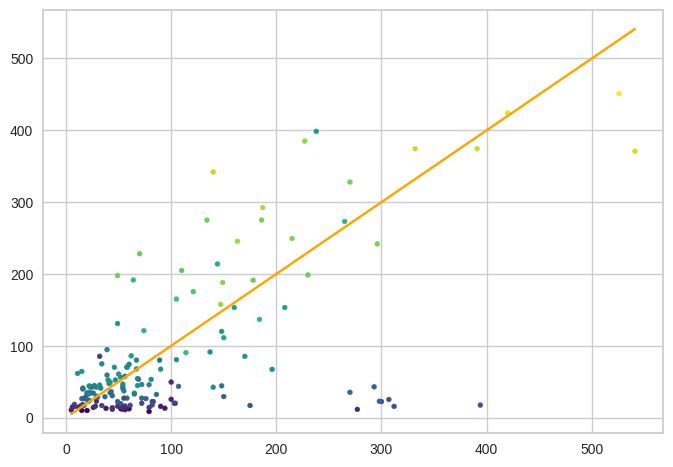

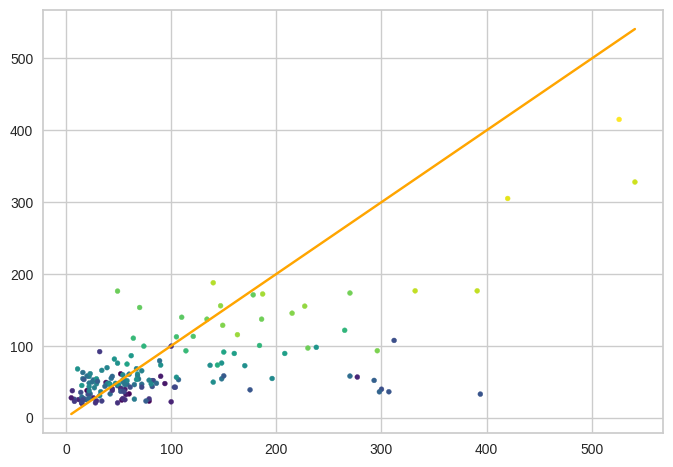

In [45]:
x = df['Thickness']
y = df['Farinotti Mean Thickness']
z = np.log(df['Area'])
plt.scatter(
    x,y,
    marker = '.',
    c = z,
    cmap = 'viridis'
)
plt.plot(
    (x.min(),x.max()), (x.min(),x.max()),
    'orange'
)
plt.show()
x = df['Thickness']
y = df['Weighted Mean Thickness 1']
z = np.log(df['Area'])
plt.scatter(
    x,y,
    marker = '.',
    c = z,
    cmap = 'viridis'
)
plt.plot(
    (x.min(),x.max()), (x.min(),x.max()),
    'orange'
)

# plt.xlabel('Farinotti')
# plt.ylabel('This Study')
# plt.colorbar(label = 'log area')

In [11]:
dft = dfg[dfg['log area'] <= 1]

In [1]:
plt.scatter(
    dft['Farinotti Mean Thickness'],
    dft['Weighted Mean Thickness 4'],
    marker = '.',
#     c = (dft['log area']),
#     cmap = 'viridis'
)
# plt.plot((0,700),(0,700),'orange')
plt.colorbar(label = 'log area')

NameError: name 'plt' is not defined

In [13]:
feat = 'Area'
print(dft[feat].mean())
print(dft[feat].median())
print(dft[feat].min())
print(dft[feat].max())

1.160937931034483
1.034
0.029
2.698


In [14]:
dft

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness 1,Weighted Mean Thickness 2,Weighted Mean Thickness 3,Weighted Mean Thickness 4,Corrected Thickness,Corrected Thickness Uncertainty,Residual Correction,Residual Correction Uncertainty,Bootstrap Uncertainty,Weighted Bootstrap Uncertainty_1,Weighted Bootstrap Uncertainty_2,Weighted Bootstrap Uncertainty_3,Weighted Bootstrap Uncertainty_4,Composite Deviation Uncertainty_1,Composite Deviation Uncertainty_2,Composite Deviation Uncertainty_3,Composite Deviation Uncertainty_4,Composite Deviation Uncertainty 3,Composite Deviation Uncertainty 20,Composite Deviation Uncertainty 40,Composite Deviation Uncertainty 60,Composite Deviation Uncertainty 80,Weighted Deviation Uncertainty_1,Weighted Deviation Uncertainty_2,Weighted Deviation Uncertainty_3,Weighted Deviation Uncertainty_4,Weighted Deviation Uncertainty_4_1,Weighted Deviation Uncertainty_4_2,Simple Deviation Uncertainty_4,MAE Uncertainty,Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness,Residual,log area,Zd,Ratio
4,RGI60-02.03411,58.222748,57.679188,10.247830,58.137302,58.139859,58.143183,58.311238,58.137302,511.875863,0.909739,0.257628,0.007436,100.257195,102.657023,102.701670,100.227160,3.158328,3.163346,3.163346,3357.364526,162.668639,15.330355,7.743316,5.246304,3.968598,511.875863,512.115241,512.173735,515.258118,546012.055312,0.528945,285.089578,266.375041,48.996700,68.138184,0.989274,6.414941e-17,13.486774,4025.0,02,51.17700,-116.33000,15.3,2390,2526,2853,0.872,69,1181,34.028140,0.936336,6.454268e-24,34.646187,7.441120,0.570123,0.029673,70.0,24.109162,-0.136966,463,1.708507
5,RGI60-02.13754,54.427780,53.334053,11.392898,54.318263,54.350794,54.354759,54.487079,54.318263,447.526429,2.540263,0.958427,0.009258,125.876265,127.808477,127.850143,126.330180,2.753475,2.761189,2.761189,2926.590691,137.027083,13.327480,6.739493,4.585507,3.460733,447.526429,447.720129,447.785335,450.550728,477480.798473,0.662323,249.136415,266.375041,43.812816,65.677015,0.988881,2.908840e-17,14.161552,4025.0,02,44.16497,-121.78496,17.6,2221,2544,2803,1.170,344,1666,34.035408,0.967572,4.517051e-20,31.859420,4.033084,0.110319,0.039821,19.0,20.282855,0.157004,582,1.595934
6,RGI60-02.13805,53.194901,52.325005,10.564065,53.095515,53.126276,53.129945,53.242816,53.095515,427.544475,3.059268,1.302151,0.007916,107.318538,109.647507,109.694892,107.579317,2.630872,2.638086,2.638086,2796.843460,136.557763,12.668614,6.409970,4.356381,3.303207,427.544475,427.730776,427.789557,430.152719,455811.377865,0.564271,237.977530,266.375041,43.606972,63.237242,0.987023,8.804069e-19,12.783600,4025.0,02,44.10682,-121.75938,20.4,2394,2612,2925,1.184,47,1391,31.214828,0.984035,1.032611e-13,32.818382,3.256174,-0.061458,0.036958,17.0,21.880687,0.168899,531,1.700971
7,RGI60-02.13828,49.851807,48.996700,11.655807,49.730050,49.789350,49.793573,49.872924,49.730050,375.712684,4.477916,2.627760,0.009667,132.201162,134.355056,134.403914,132.791338,2.304513,2.313790,2.313790,2449.263405,115.882980,11.093000,5.610764,3.822653,2.888865,375.712684,375.861026,375.924579,378.048561,400680.422748,0.689272,209.005504,266.375041,38.856547,61.014583,0.987948,4.794266e-18,14.395069,4025.0,02,44.10747,-121.78366,20.8,2297,2567,2857,0.557,318,1471,29.152315,0.959724,5.834692e-15,32.426537,4.965083,0.548696,0.016238,21.0,20.577735,-0.585190,560,1.705870
8,RGI60-02.13874,52.149090,50.806095,11.770809,52.030122,52.070709,52.074953,52.203022,52.030122,410.970031,3.509047,1.696034,0.009865,134.088149,136.032676,136.078173,134.848371,2.523029,2.531069,2.531069,2682.152959,124.575420,12.164549,6.163261,4.201055,3.175153,410.970031,411.143671,411.210506,413.914072,438567.226036,0.704404,228.712287,266

In [15]:
feat_list = ['Area', 'Lmax', 'Zmin','Zmax','Zd','Slope', 'Residual']
name = ['mean', 'median', 'min', 'max','count']
dfg_stats = pd.DataFrame(columns = feat_list, index = name)
for i in feat_list:
    dft = dfg[i]
    functions = [
        np.round(dft.mean(), 3),
        np.round(dft.median(), 3), 
        np.round(dft.min(), 3),
        np.round(dft.max(), 3),
        len(dft)
    ]
    for n, fn in zip(name, functions):
        dfg_stats[i].loc[n] = fn
        
        
dfl_stats = pd.DataFrame(columns = feat_list, index = name)
for i in feat_list:
    dft = dfl[i]
    functions = [
        np.round(dft.mean(), 3),
        np.round(dft.median(), 3), 
        np.round(dft.min(), 3),
        np.round(dft.max(), 3),
        len(dfl)
    ]
    for n, fn in zip(name, functions):
        dfl_stats[i].loc[n] = fn
dfg_stats

,Area,Lmax,Zmin,Zmax,Zd,Slope,Residual
mean,2.782,2555.326,2634.495,3277.337,642.842,18.858,13.796
median,1.315,2000.0,2825.5,3471.0,535.5,18.25,14.498
min,0.029,100,1,423,77,6.9,0.049
max,50.408,16565,5710,6036,2965,48.6,35.848
count,184,184,184,184,184,184,184


In [16]:
dfl_stats

,Area,Lmax,Zmin,Zmax,Zd,Slope,Residual
mean,41.779,6173.535,1829.019,2641.42,812.401,14.914,-22.876
median,5.205,3782.0,2369.0,3195.0,726.0,15.2,-13.64
min,0.208,767,0,247,215,3.6,-181.325
max,2771.412,41911,5068,6078,2555,29.5,-0.049
count,157,157,157,157,157,157,157


/tmp/ipykernel_1076058/1773572738.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([dfg[i], dfl[i]]).T
/tmp/ipykernel_1076058/1773572738.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([dfg[i], dfl[i]]).T
/tmp/ipykernel_1076058/1773572738.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data

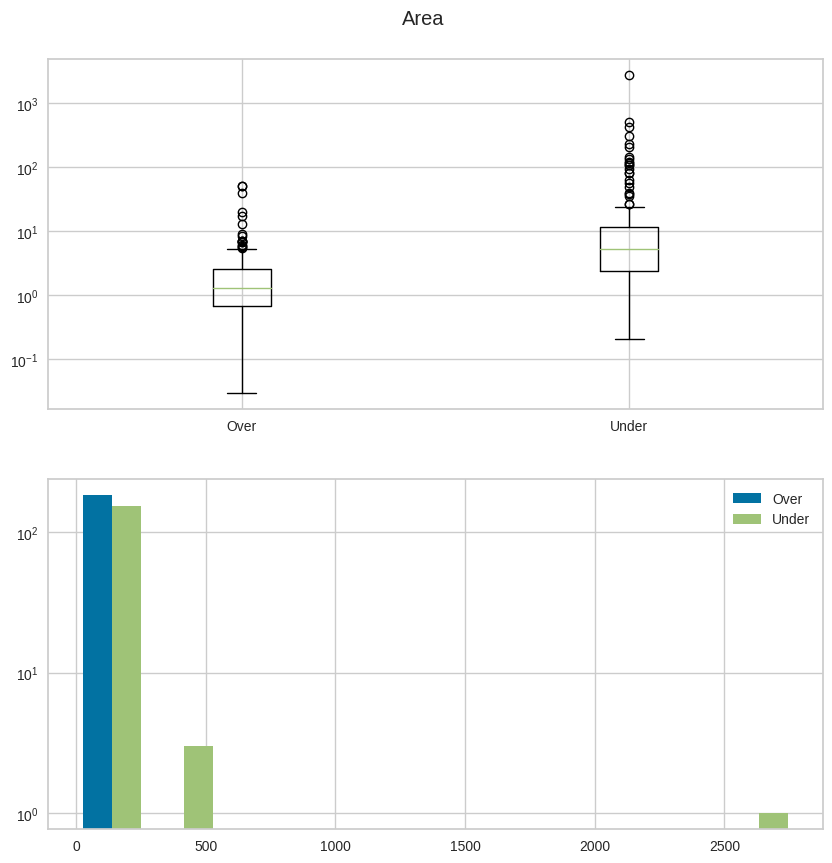

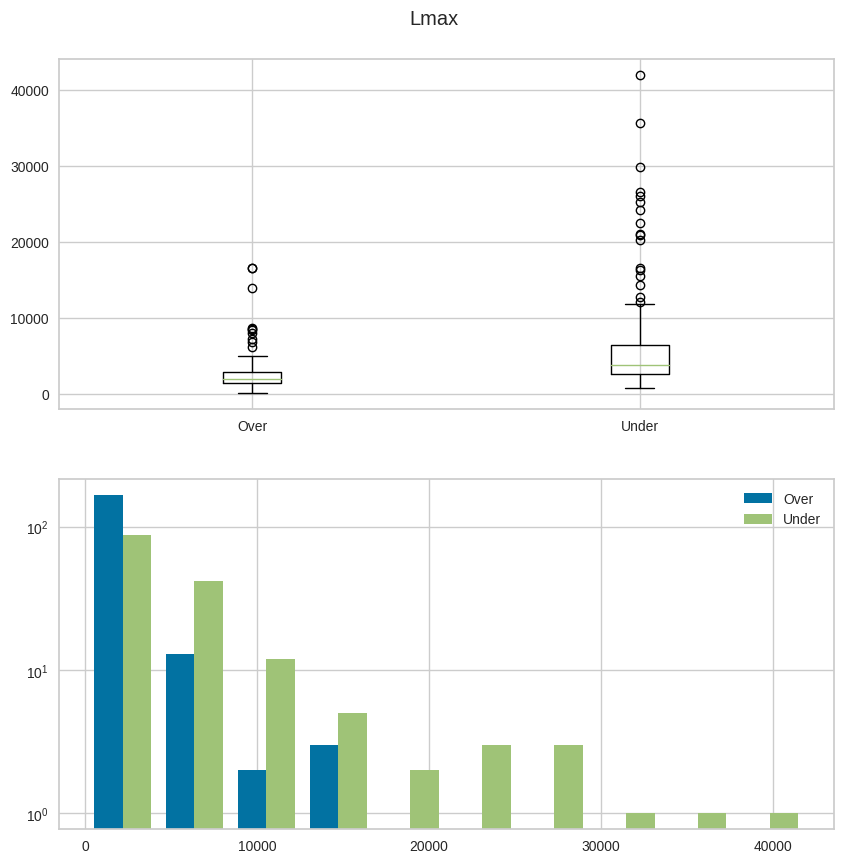

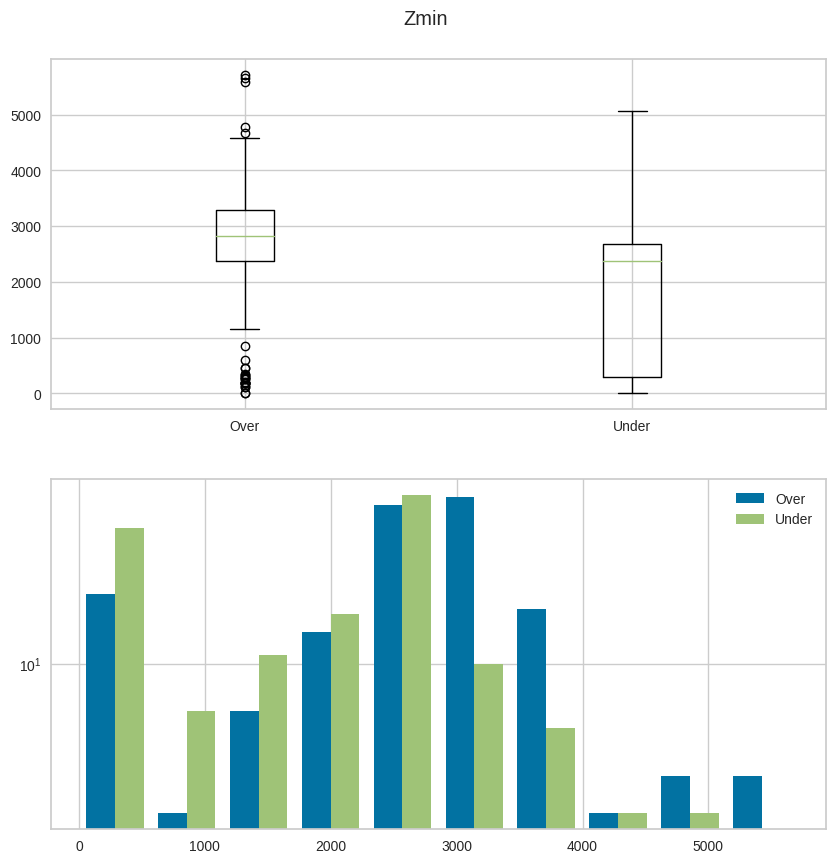

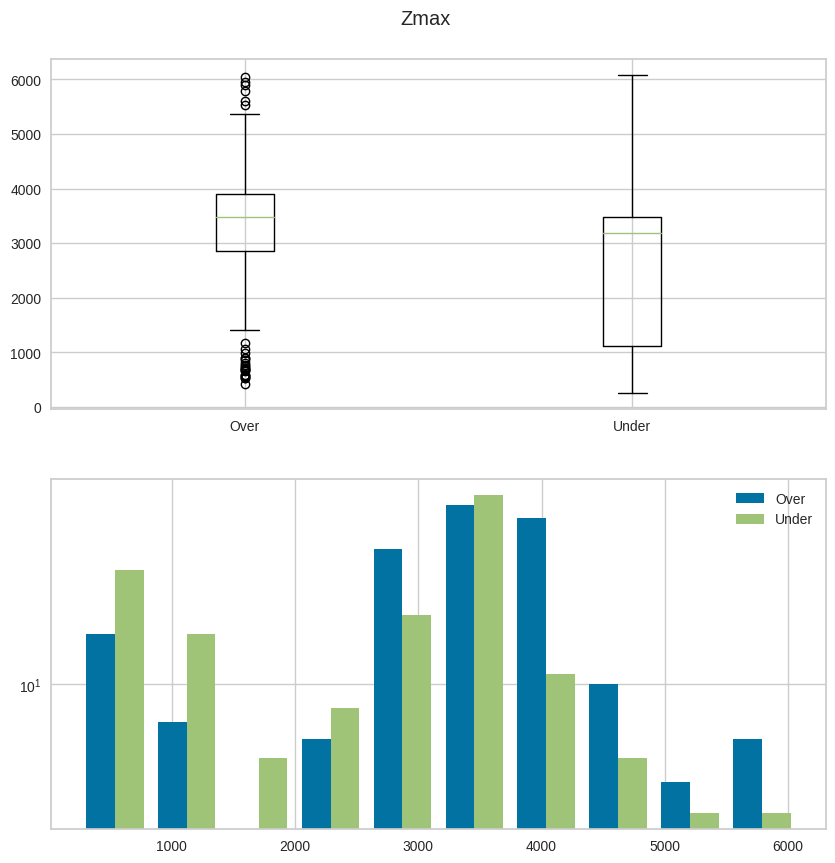

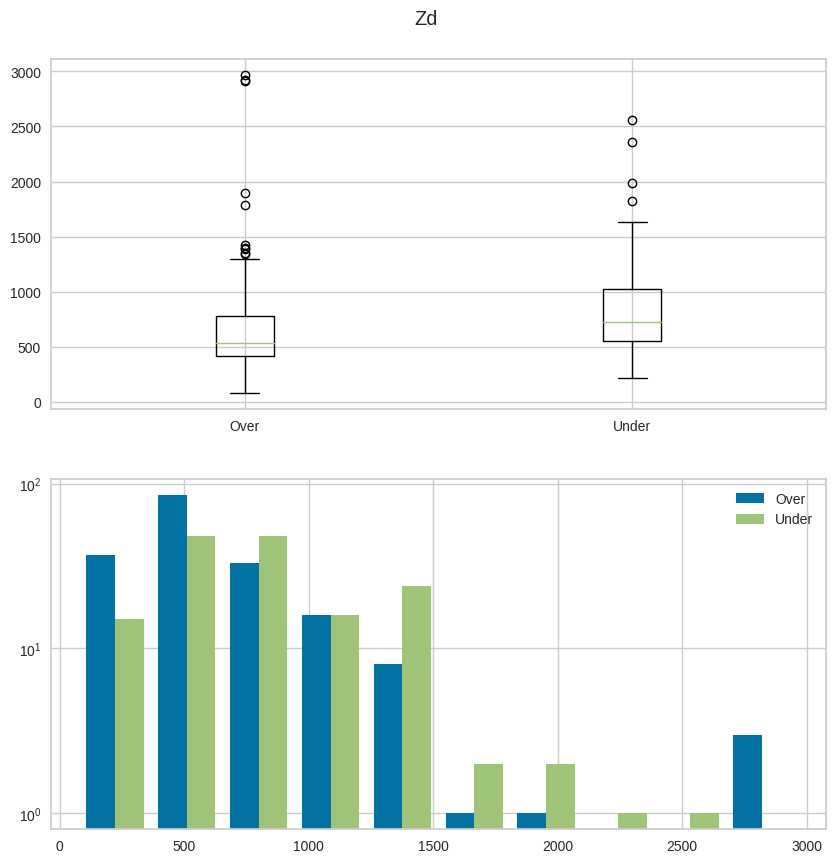

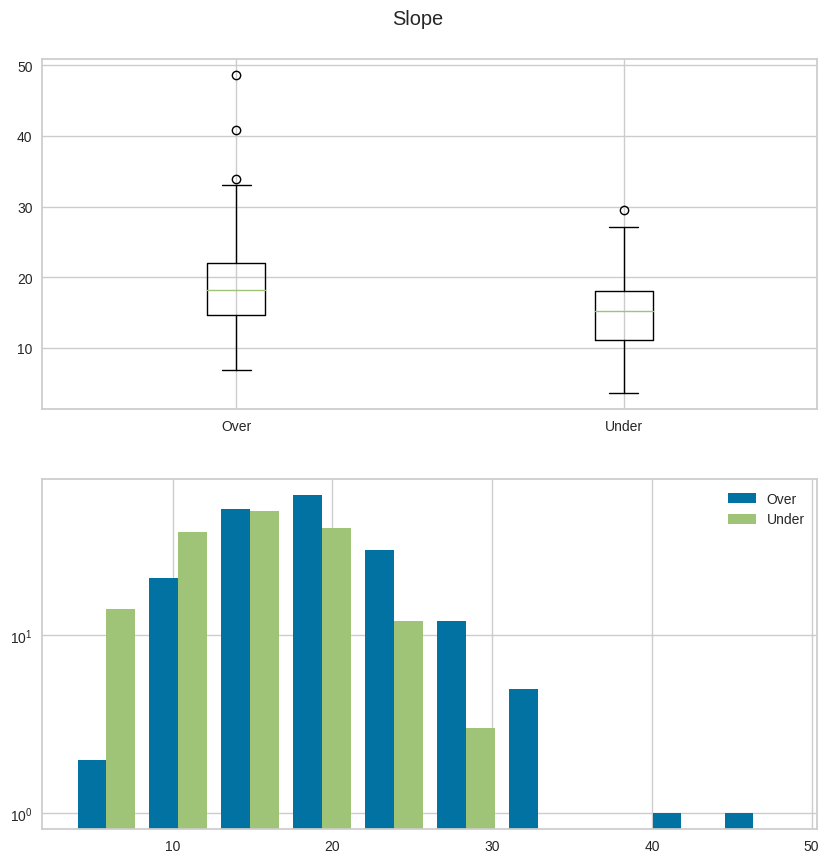

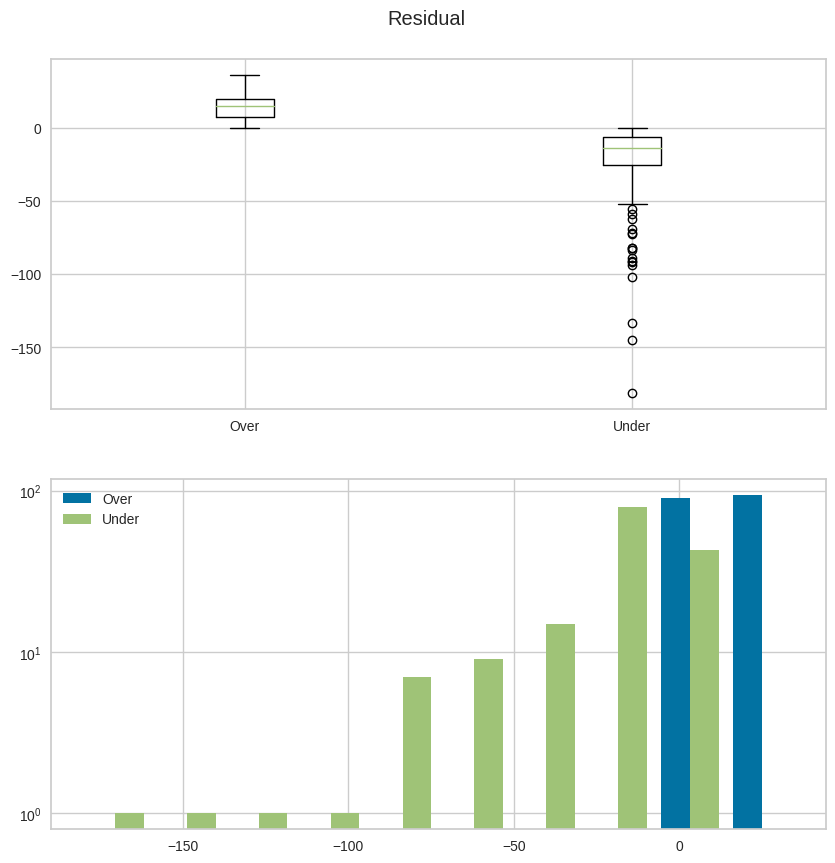

In [17]:
for n, i in enumerate(feat_list):
    fig, ax = plt.subplots(2,1, figsize = (10,10))

    data = np.array([dfg[i], dfl[i]]).T

    ax[0].boxplot(data)
    if i == 'Area':
        ax[0].set_yscale('log')
#         ax[1].set_yscale('log')
    ax[0].set_xticks([1,2], ['Over', 'Under'])

    ax[1].hist(data, label = ['Over', 'Under'])
    ax[1].legend()
    ax[1].set_yscale('log')
    plt.suptitle(i, y = 0.93)

In [18]:
dfg

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness 1,Weighted Mean Thickness 2,Weighted Mean Thickness 3,Weighted Mean Thickness 4,Corrected Thickness,Corrected Thickness Uncertainty,Residual Correction,Residual Correction Uncertainty,Bootstrap Uncertainty,Weighted Bootstrap Uncertainty_1,Weighted Bootstrap Uncertainty_2,Weighted Bootstrap Uncertainty_3,Weighted Bootstrap Uncertainty_4,Composite Deviation Uncertainty_1,Composite Deviation Uncertainty_2,Composite Deviation Uncertainty_3,Composite Deviation Uncertainty_4,Composite Deviation Uncertainty 3,Composite Deviation Uncertainty 20,Composite Deviation Uncertainty 40,Composite Deviation Uncertainty 60,Composite Deviation Uncertainty 80,Weighted Deviation Uncertainty_1,Weighted Deviation Uncertainty_2,Weighted Deviation Uncertainty_3,Weighted Deviation Uncertainty_4,Weighted Deviation Uncertainty_4_1,Weighted Deviation Uncertainty_4_2,Simple Deviation Uncertainty_4,MAE Uncertainty,Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness,Residual,log area,Zd,Ratio
1,RGI60-01.00570,90.494202,91.317276,15.268613,90.428007,90.313272,90.316712,90.794418,103.970503,1259.267243,-13.542496,23.213818,0.015211,214.499329,223.118536,223.229675,208.131658,7.631602,7.620744,7.620744,8114.782769,395.087718,37.646807,18.951143,12.774442,9.614525,1236.053425,1236.725925,1236.821753,1246.891161,1.321018e+06,0.975511,688.711669,266.375041,79.049373,103.966450,0.953788,6.639497e-34,16.051460,4025.0,01,63.28100,-145.42700,14.0,1162,1858,2438,17.567,172,8639,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,147.0,14.771217,2.866022,1276,1.195240
3,RGI60-01.16374,67.979103,67.343613,12.929232,67.879119,67.859826,67.863862,68.128457,71.206004,699.285503,-3.326885,1.637143,0.011914,159.598535,163.046847,163.106629,158.828281,4.302532,4.306342,4.306342,4574.046259,215.046245,20.988183,10.595381,7.188800,5.418646,697.648360,697.987888,698.071170,703.219132,7.451009e+05,0.850274,388.639342,266.375041,55.116073,80.756830,0.994698,6.001210e-11,16.927746,4025.0,01,61.20000,-140.30200,14.0,2145,2509,2894,5.859,341,3374,50.680640,0.971547,1.995731e-39,49.849970,6.921771,0.179289,0.296938,66.0,17.198479,1.767979,749,1.339350
4,RGI60-02.03411,58.222748,57.679188,10.247830,58.137302,58.139859,58.143183,58.311238,58.137302,511.875863,0.909739,0.257628,0.007436,100.257195,102.657023,102.701670,100.227160,3.158328,3.163346,3.163346,3357.364526,162.668639,15.330355,7.743316,5.246304,3.968598,511.875863,512.115241,512.173735,515.258118,5.460121e+05,0.528945,285.089578,266.375041,48.996700,68.138184,0.989274,6.414941e-17,13.486774,4025.0,02,51.17700,-116.33000,15.3,2390,2526,2853,0.872,69,1181,34.028140,0.936336,6.454268e-24,34.646187,7.441120,0.570123,0.029673,70.0,24.109162,-0.136966,463,1.708507
5,RGI60-02.13754,54.427780,53.334053,11.392898,54.318263,54.350794,54.354759,54.487079,54.318263,447.526429,2.540263,0.958427,0.009258,125.876265,127.808477,127.850143,126.330180,2.753475,2.761189,2.761189,2926.590691,137.027083,13.327480,6.739493,4.585507,3.460733,447.526429,447.720129,447.785335,450.550728,4.774808e+05,0.662323,249.136415,266.375041,43.812816,65.677015,0.988881,2.908840e-17,14.161552,4025.0,02,44.16497,-121.78496,17.6,2221,2544,2803,1.170,344,1666,34.035408,0.967572,4.517051e-20,31.859420,4.033084,0.110319,0.039821,19.0,20.282855,0.157004,582,1.595934
6,RGI60-02.13805,53.194901,52.325005,10.564065,53.095515,53.126276,53.129945,53.242816,53.095515,427.544475,3.059268,1.302151,0.007916,107.318538,109.647507,109.694892,107.579317,2.630872,2.638086,2.638086,2796.843460,136.557763,12.668614,6.409970,4.356381,3.303207,427.544475,427.730776,427.789557,430.152719,4.558114e+05,0.564271,23

In [41]:
df = gl.load_notebook_data('4')
glac = gl.parameterize_data('1')
glac = glac[['Area_RGI','Area_GlaThiDa','RGIId', 'Thickness']]
df = pd.merge(df, glac, on = 'RGIId', how = 'inner')

glac = gl.parameterize_data('4')
glac = glac[['Area_RGI','Area_GlaThiDa','RGIId', 'Thickness']]
df_between = gl.load_notebook_data('4')
df_between = pd.merge(df_between, glac, on = 'RGIId', how = 'inner')

df_between = pd.concat([df, df_between], axis = 0)
df_between = df_between.drop_duplicates(keep = False)
df_between['Residual'] = df_between['Weighted Mean Thickness 4'] - df_between['Thickness']
import math
def findlog(x):
    if x > 0:
        log = math.log(x)
    elif x < 0:
        log = math.log(x*-1)*-1
    elif x == 0:
        log = 0
    return log

df_between['log residual'] = df_between['Residual'].apply(
    lambda row: findlog(row)
)

In [42]:
df_between

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness 1,Weighted Mean Thickness 2,Weighted Mean Thickness 3,Weighted Mean Thickness 4,Corrected Thickness,Corrected Thickness Uncertainty,Residual Correction,Residual Correction Uncertainty,Bootstrap Uncertainty,Weighted Bootstrap Uncertainty_1,Weighted Bootstrap Uncertainty_2,Weighted Bootstrap Uncertainty_3,Weighted Bootstrap Uncertainty_4,Composite Deviation Uncertainty_1,Composite Deviation Uncertainty_2,Composite Deviation Uncertainty_3,Composite Deviation Uncertainty_4,Composite Deviation Uncertainty 3,Composite Deviation Uncertainty 20,Composite Deviation Uncertainty 40,Composite Deviation Uncertainty 60,Composite Deviation Uncertainty 80,Weighted Deviation Uncertainty_1,Weighted Deviation Uncertainty_2,Weighted Deviation Uncertainty_3,Weighted Deviation Uncertainty_4,Weighted Deviation Uncertainty_4_1,Weighted Deviation Uncertainty_4_2,Simple Deviation Uncertainty_4,MAE Uncertainty,Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Area_RGI,Area_GlaThiDa,Thickness,Residual,log residual
3,RGI60-01.02236,51.709263,50.033535,13.439234,51.566162,51.625540,51.630576,51.753938,51.566162,404.330031,3.703626,1.916665,0.012848,174.414554,177.784868,177.861750,175.322115,2.472173,2.482012,2.482012,2628.637009,123.439666,11.854960,6.002176,4.100675,3.106551,404.330031,404.490755,404.569305,407.484608,4.316861e+05,0.917600,224.870586,266.375041,39.073212,64.261516,0.984227,8.469930e-21,16.174629,4025.0,01,69.2760,-143.8190,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,0.153,7.40,83.0,-31.246062,-3.441893
4,RGI60-01.02236,51.709263,50.033535,13.439234,51.566162,51.625540,51.630576,51.753938,51.566162,404.330031,3.703626,1.916665,0.012848,174.414554,177.784868,177.861750,175.322115,2.472173,2.482012,2.482012,2628.637009,123.439666,11.854960,6.002176,4.100675,3.106551,404.330031,404.490755,404.569305,407.484608,4.316861e+05,0.917600,224.870586,266.375041,39.073212,64.261516,0.984227,8.469930e-21,16.174629,4025.0,01,69.2760,-143.8190,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,0.153,6.02,82.0,-30.246062,-3.409366
5,RGI60-01.10679,56.635986,55.144058,15.180750,56.501136,56.493905,56.499170,56.792497,56.501136,485.303583,1.603278,0.756952,0.016290,215.899072,219.123821,219.212863,217.948826,2.952194,2.955352,2.955352,3142.877394,140.728989,14.026376,7.198353,4.943202,3.766503,485.303583,485.540377,485.630969,490.606276,5.190809e+05,1.152649,269.762054,266.375041,42.859892,71.173852,0.986763,5.558868e-19,18.542690,4025.0,01,61.1070,-147.0070,26.0,619,661,720,0.041,57,-9,11.488369,0.969822,1.027023e-01,11.756308,0.521028,0.086867,0.000471,0.041,1050.00,277.0,-220.207503,-5.394570
6,RGI60-01.14445,57.970821,56.491581,13.966268,57.834057,57.852217,57.857306,58.086446,57.834057,507.880967,1.035959,0.444150,0.013877,185.700621,188.766427,188.842182,187.071012,3.109864,3.116647,3.116647,3308.195834,153.074941,14.938406,7.599231,5.188437,3.931723,507.880967,508.111084,508.200388,512.616755,5.427786e+05,0.988383,282.627769,266.375041,45.208400,71.307752,0.986239,2.238653e-19,17.283382,4025.0,01,60.0250,-139.2840,23.0,1158,1447,1818,0.880,193,1561,35.248592,0.990901,1.165638e-07,36.418293,3.340641,0.150466,0.031019,0.880,NaN,270.0,-211.913554,-5.356178
7,RGI60-01.16314,65.324890,64.796677,12.868190,65.221882,65.218469,65.222558,65.444228,67.382859,645.243065,-2.160977,0.826466,0.011747,158.271413,162.226140,162.297909,157.740310,3.970673,3.976120,3.976120,4221.944382,208.687678,19.240694,9.723955,6.592496,4.988827,644.416599,644.721632,644.802369,649.219093,6.878127e+05,0.833623,358.88331

In [43]:
# sanity check 
print(500 - 341)
print(len(df_between))

159
159


In [44]:
df = df_between

In [23]:
df['Area_GlaThiDa'].isna().sum()

10

Text(0.02, 0.5, 'RGI Area')

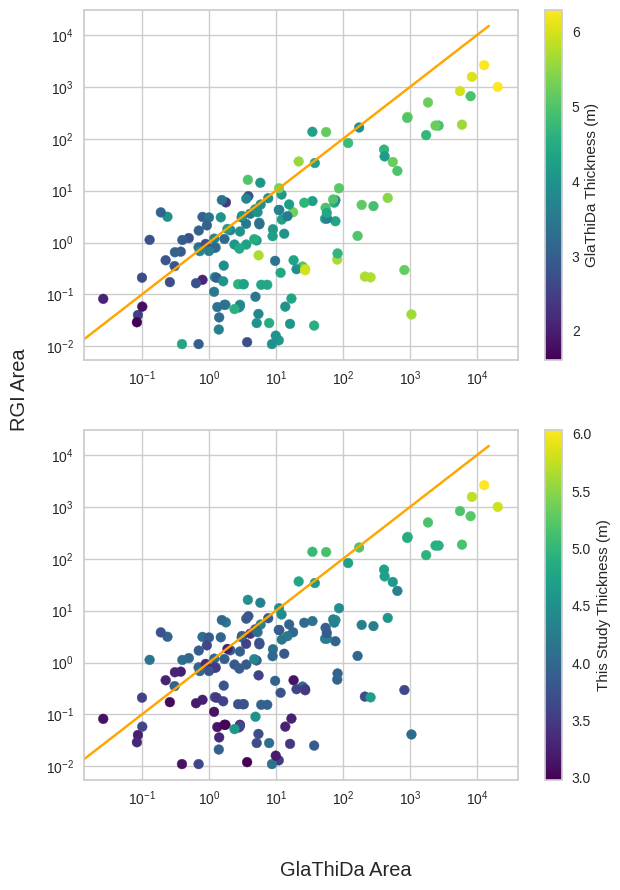

In [54]:
df['Residual'] = (df['Weighted Mean Thickness 4'] - df['Thickness']) / df['Thickness']

fig, ax = plt.subplots(2,1,figsize = (7,10))
x = df['Area_GlaThiDa'].to_numpy()
y = df['Area_RGI'].to_numpy()
z = np.array([np.log(df['Thickness']) , np.log(df['Weighted Mean Thickness 4'])])
# z = df['Weighted Mean Thickness 4']
for i in range(2):
    if i == 0:
        thickness_label = 'GlaThiDa Thickness (m)'
    if i == 1:
        thickness_label = 'This Study Thickness (m)'
        
    ax[i].plot((0,15000), (0,15000), color = 'orange')
    scatter = ax[i].scatter(
        x,y,c = z[i],cmap = 'viridis'
    )
    
    plt.colorbar(scatter, label = thickness_label)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
fig.supxlabel('GlaThiDa Area')
fig.supylabel('RGI Area')


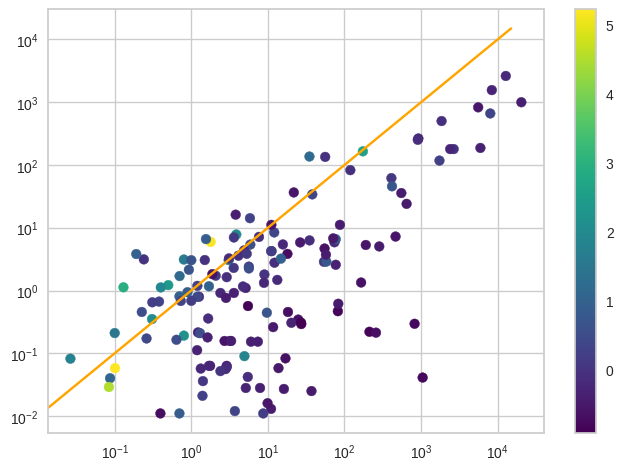

In [55]:
plt.scatter(
    x,y, c = df['Residual'], cmap = 'viridis'
)
plt.colorbar()
plt.plot((0,15000), (0,15000), color = 'orange')
plt.xscale('log')
plt.yscale('log')

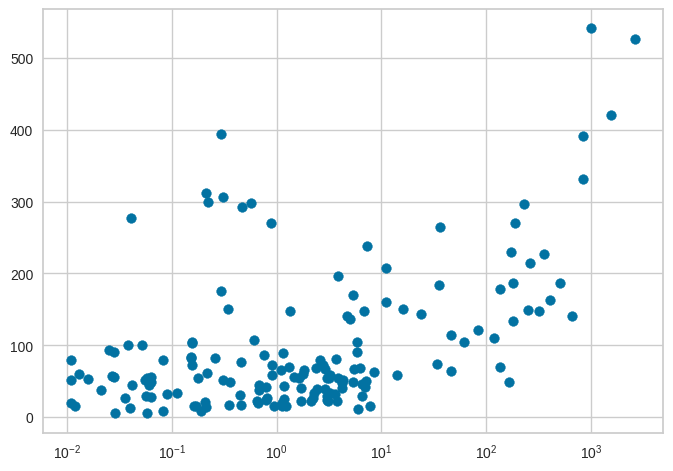

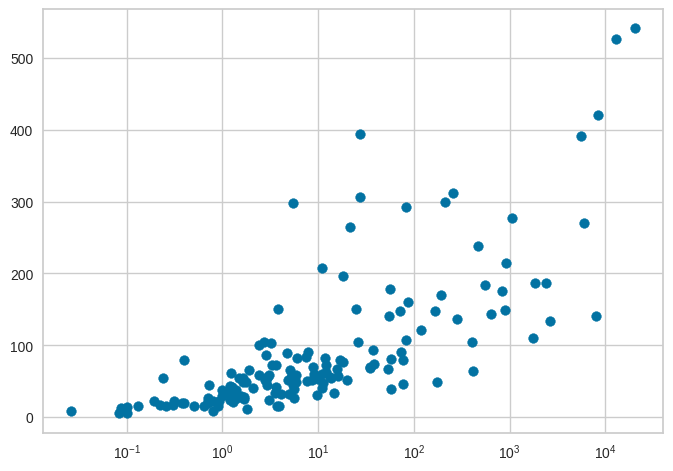

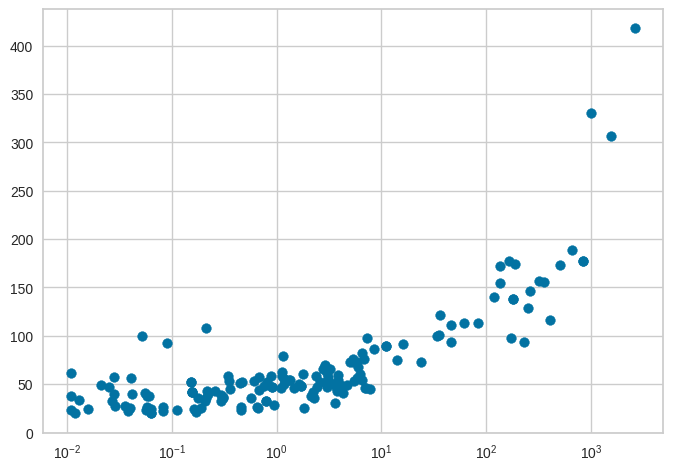

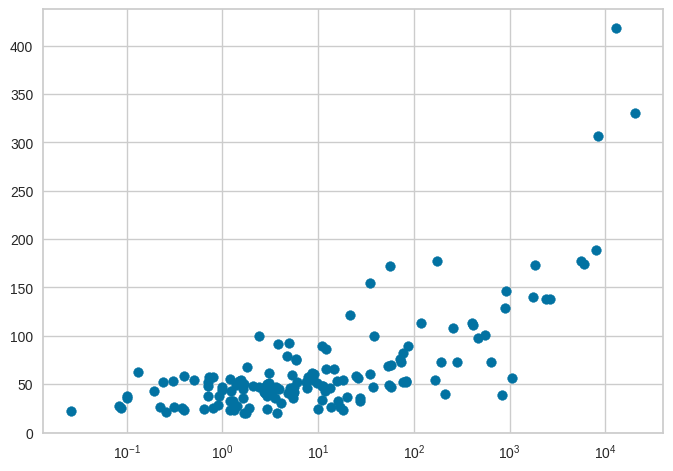

In [25]:
plt.scatter(
    df['Area_RGI'],
    df['Thickness'],
    )
plt.xscale('log')
plt.show()

plt.scatter(
    df['Area_GlaThiDa'],
    df['Thickness']
    )
plt.xscale('log')
plt.show()

plt.scatter(
    df['Area_RGI'],
    df['Weighted Mean Thickness 4'],
    )
plt.xscale('log')
plt.show()

plt.scatter(
    df['Area_GlaThiDa'],
    df['Weighted Mean Thickness 4'],
    )
plt.xscale('log')
plt.show()


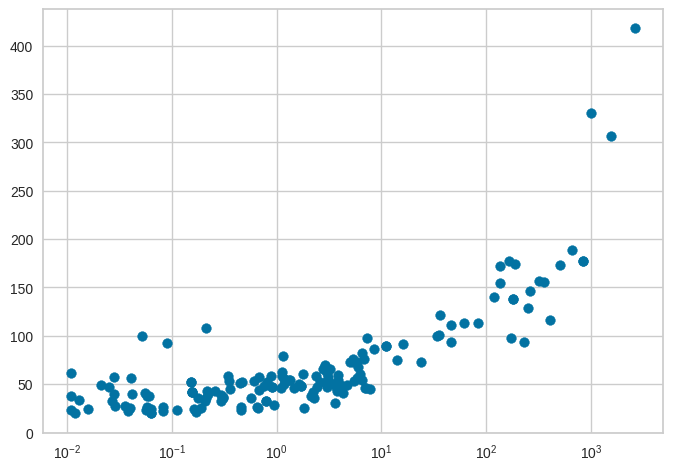

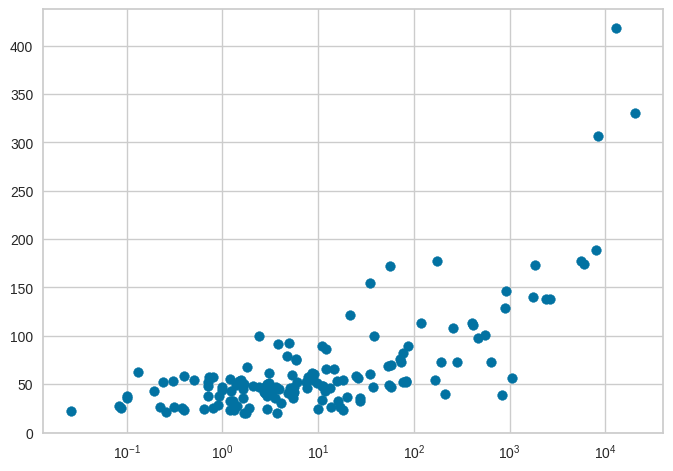

In [26]:
plt.scatter(
    df['Area_RGI'],
    df['Weighted Mean Thickness 4']
    )
plt.xscale('log')
plt.show()

plt.scatter(
    df['Area_GlaThiDa'],
    df['Weighted Mean Thickness 4']
    )
plt.xscale('log')
plt.show()

In [27]:
isnan = np.ndarray.tolist(
    np.where(
        np.isnan(x)
    )[0]
)

len(df.iloc[isnan])

10

In [28]:
data = gl.parameterize_data('4')
df = data

In [29]:
data

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area_RGI,Area_GlaThiDa,Aspect,Lmax,Thickness
0,RGI60-01.00037,63.469173,-146.528168,12.0,722,1841,3081,234.583,246.00,30,41911,235.0
1,RGI60-01.00570,63.281000,-145.427000,14.0,1162,1858,2438,17.567,19.32,172,8639,147.0
2,RGI60-01.01104,58.380000,-134.349000,10.0,676,1123,1494,9.528,11.70,327,6332,66.0
8,RGI60-01.16374,61.200000,-140.302000,14.0,2145,2509,2894,5.859,4.30,341,3374,66.0
9,RGI60-02.03411,51.177000,-116.330000,15.3,2390,2526,2853,0.872,1.00,69,1181,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
489,RGI60-17.14088,-33.029600,-70.098400,29.0,2929,5121,5894,8.376,7.86,358,8560,59.0
490,RGI60-17.14647,-30.145400,-69.927600,29.3,4664,5187,5525,1.189,1.92,148,1596,28.0
491,RGI60-17.15038,-28.538700,-69.731800,16.0,4784,5234,5597,3.140,2.37,190,3349,39.0
492,RGI60-17.15087,-28.381400,-69.609100,11.6,5068,5406,5753,5.209,4.28,79,3782,67.0


In [30]:
isnan = np.ndarray.tolist(
    np.where(
        np.isnan(data['Area_GlaThiDa'])
    )[0]
)

len(data.iloc[isnan])

0

In [31]:
len(df_between)

159

In [32]:
plt.scatter(
    df_between['Lmax']
    df_
)

SyntaxError: invalid syntax (265239734.py, line 3)